In [31]:
print ("This notebook will be used for the data science capstone project")

This notebook will be used for the data science capstone project


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
print ("Hello Capstone Project Course!")


Hello Capstone Project Course!


In [34]:
df = pd.read_csv(r"C:\Users\lchia\Downloads\Data-Collisions.csv")
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


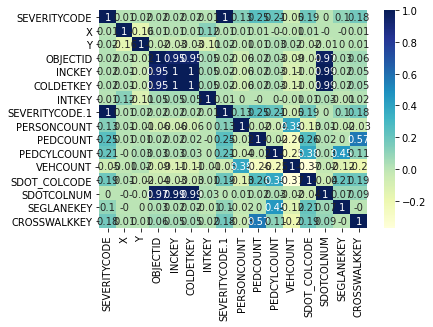

In [35]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap = "YlGnBu")

In [56]:
avg_PERSONCOUNT = df["PERSONCOUNT"].astype('float').mean(axis=0)
df["PERSONCOUNT"].replace(np.NaN, avg_PERSONCOUNT, inplace=True)

avg_PEDCOUNT = df["PEDCOUNT"].astype('float').mean(axis=0)
df["PEDCOUNT"].replace(np.NaN, avg_PEDCOUNT, inplace=True)

avg_PEDCYLCOUNT = df["PEDCYLCOUNT"].astype('float').mean(axis=0)
df["PEDCYLCOUNT"].replace(np.NaN, avg_PEDCYLCOUNT, inplace=True)

avg_SDOT_COLCODE = df["SDOT_COLCODE"].astype('float').mean(axis=0)
df["SDOT_COLCODE"].replace(np.NaN, avg_SDOT_COLCODE, inplace=True)

avg_CROSSWALKKEY = df["CROSSWALKKEY"].astype('float').mean(axis=0)
df["CROSSWALKKEY"].replace(np.NaN, avg_CROSSWALKKEY, inplace=True)

In [57]:
X = df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'SDOT_COLCODE', 'CROSSWALKKEY']]
Y = df['SEVERITYCODE']

In [58]:
X.isnull().sum()

PERSONCOUNT     0
PEDCOUNT        0
PEDCYLCOUNT     0
SDOT_COLCODE    0
CROSSWALKKEY    0
dtype: int64

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(155738, 5)
(38935, 5)
(155738,)
(38935,)


In [60]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [61]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The Model Performance for Training Set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The Model Performance for Training Set
--------------------------------------
RMSE is 0.4256676468031229
R2 score is 0.13334494987252565




The Model Performance for Testing Set
-------------------------------------
RMSE is 0.42757921266459836
R2 score is 0.13550566377825113


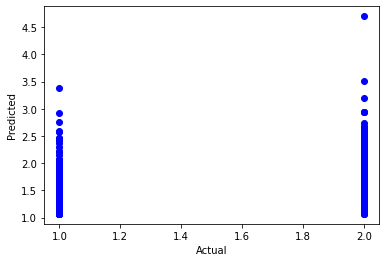

(38935, 5)

In [62]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The Model Performance for Testing Set")
print("-------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.scatter(Y_test, y_test_predict, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()
x_test_array = np.asarray( X_test )
x_test_array.shape


In [112]:
Pedestrian_Count = input("Total Number of Pedestrians Involved in Accident")
Pedestrian_Bicycle_Count = input("Total Number of Biking Pedestrians Involved in Accident")
SDOT_COLCODE = input("The Code Given to the Collision by the Seattle Department of Transportation")
Person_Count = input("The Total Number of People Involved in Accident")
Crosswalkkey = input("A Key for the Crosswalk Where the Accident Occured")

Total Number of Pedestrians Involved in Accident0
Total Number of Biking Pedestrians Involved in Accident1
The Code Given to the Collision by the Seattle Department of Transportation18
The Total Number of People Involved in Accident3
A Key for the Crosswalk Where the Accident Occured0


In [113]:
Pedestrian_Count = float(Pedestrian_Count)
Pedestrian_Bicycle_Count = float(Pedestrian_Bicycle_Count)
SDOT_COLCODE = float(SDOT_COLCODE)
Person_Count = float(Person_Count)
Crosswalkkey = float(Crosswalkkey)

In [114]:
lst = [Pedestrian_Count, Pedestrian_Bicycle_Count, SDOT_COLCODE, Person_Count, Crosswalkkey]

In [115]:
lst_cap = np.asarray(lst)
lst = lst_cap.reshape((1,5))
print (lst.shape)

(1, 5)


In [116]:
print (lst)

[[ 0.  1. 18.  3.  0.]]


In [117]:
user_predict = lin_model.predict(lst)

In [118]:
user_predict_final = int(user_predict/3)

In [119]:
print (user_predict_final)

3
